In [4]:
using DataFrames
using Plots

In [5]:
type NNparams
    a::Array{Float64}
end 
toyparams = NNparams([rand(),rand(),rand()])

NNparams([0.289862, 0.90701, 0.63549])

In [6]:
function σ(z::Float64)
    return 1.0 / (1.0 + exp(-z))
end
σ(.5)

0.6224593312018546

In [7]:
function updateNNparams(gradient::Array{Float64,1}, 
                        params::NNparams, learning_rate::Float64)
   params.a = params.a - gradient*learning_rate
    return params
end
#test
toyparams = NNparams([rand(),rand(),rand()])
grad = ∇(x,y,toyparams)
updateNNparams(grad,toyparams,.5)

LoadError: [91mUndefVarError: ∇ not defined[39m

In [8]:
function printNNparam(param::NNparams)
    @printf("PrintNN ==> %f %f %f\n", param.a[1], param.a[2], param.a[3])
    return
end

printNNparam (generic function with 1 method)

In [9]:
function output(params::NNparams, x::Array{Float64,1})
    #nb_data = size(x[1,:])
    #for i = 1:nb_data
    #x = x[i, :]
    return σ(dot(params.a,x))
    #end
end 

output (generic function with 1 method)

In [10]:
function loss(params::NNparams, yi::Array{Float64,1}, 
                x::Array{Float64,2})
    nb_data = size(x)[1]
     y_pred = zeros(length(yi))
    @assert(size(x)[1]== length(yi))
   for i = 1:nb_data
        y_pred[i]= output(params,x[i,:])
    end
    return sum(yi.*log.(1e-7+y_pred) .+ (1-yi).*log.(1e-7+1-y_pred))
end

loss (generic function with 1 method)

In [11]:
#gradient 
function ∇(x::Array{Float64,2},y::Array{Float64,1}, params::NNparams)
    grad = [0.0 for i=1:size(x)[2]]
    nb_data = size(x)[1]
    for i = 1:nb_data
        xi = x[i, :]
        yi = y[i]
        y_pred = output(params, xi)
        grad = grad .+ xi.*(yi - y_pred)
    end
    grad = grad/ nb_data
    return grad::Array{Float64,1}
end

∇ (generic function with 1 method)

In [12]:
function convertdata_to_array(dtf::DataFrame)
    nb_data = size(dtf)[1]
        x = zeros(Float64, nb_data, 3)
        
        x[:,1] = dtf[:x1]
        x[:,2] = dtf[:x2]
        x[:,3] = ones(Float64,size(x)[1])
        
        y = convert(Array, dtf[:y]) * 1.0
        #x = convert(Array, df[:x1], df[:x2], ones(Float64, size(x)[1]))
        return x,y
    end

convertdata_to_array (generic function with 1 method)

In [13]:
function init_params(x::Array{Float64,2})
    return [rand() for i = 1:size(x[1, :])[1]]
    end 
test = init_params(rand(4,4))
x= rand(5,5)
test

4-element Array{Float64,1}:
 0.135437
 0.52602 
 0.548247
 0.4612  

In [14]:
function select_trainingdata(x::Array{Float64,2}, y::Array{Float64,1}, batch_size::Int)
    nb_data = length(y)
    
    ids = [i for i = 1:nb_data]
    sampled_ids = sample(ids, batch_size)
    
    x_training = x[sampled_ids, :]
    y_training = y[sampled_ids]
    
    return x_training, y_training
end


select_trainingdata (generic function with 1 method)

In [15]:
x,y = convertdata_to_array(dtf)
testparams = init_params(x)

LoadError: [91mUndefVarError: dtf not defined[39m

In [16]:
function update_learning_rate(init_learning_rate::Float64, nb_steps::Int)
    return init_learning_rate* ((1.0)/ (1.0 + (.05*nb_steps)))
end

update_learning_rate (generic function with 1 method)

In [35]:
dtf = readtable("data.csv")
x,y = convertdata_to_array(dtf)
nb_steps = 1000

params = NNparams(init_params(x))
param_history_a1 = Float64[]
param_history_a2 = Float64[]
param_history_a3 = Float64[]
loss_history = Float64[]
output_history = Float64[]
grad_history = Float64[]
learning_rate_history = Float64[]
y_pred_a = Float64[] 
y_training_a =[]

for s = 1:nb_steps  
    x_training,y_training = select_trainingdata(x,y,1000)
    grad = ∇(x_training, y_training, params)
    learning_rate = update_learning_rate(.07,s)
    params = updateNNparams(grad,params,learning_rate)
    result = output(params, x_training[s,:])
    loss_at_this_step = loss(params,y,x)
    @printf("Step %d / %d, loss = %f\n", s, nb_steps, loss_at_this_step)
    @printf("a_1 = %f, a_2 = %f, b = %f\n", params.a[1],params.a[2],
        params.a[3])
    @printf("\tgrad = %f\n", norm(grad))
    @printf("rate = %f\n",learning_rate)
    y_pred = output(params, x_training[s,:])
    #push!(param_history,params)
    push!(param_history_a1, params.a[1])
    push!(param_history_a2, params.a[2])
    push!(param_history_a3, params.a[3])
    push!(y_pred_a,y_pred)
    push!(loss_history, loss_at_this_step)
    push!(output_history,result)
    push!(y_training_a,y_training)
   
end
print

Step 1 / 1000, loss = -1157.449084
a_1 = 0.126641, a_2 = 0.362720, b = 0.500172
	grad = 1.885241
rate = 0.066667
Step 2 / 1000, loss = -1534.416328
a_1 = 0.248630, a_2 = 0.454906, b = 0.528224
	grad = 2.442868
rate = 0.063636
Step 3 / 1000, loss = -1920.869562
a_1 = 0.367813, a_2 = 0.542419, b = 0.556414
	grad = 2.472914
rate = 0.060870
Step 4 / 1000, loss = -2313.124115
a_1 = 0.488878, a_2 = 0.625526, b = 0.583925
	grad = 2.561138
rate = 0.058333
Step 5 / 1000, loss = -2715.790442
a_1 = 0.609962, a_2 = 0.712754, b = 0.611962
	grad = 2.711489
rate = 0.056000
Step 6 / 1000, loss = -3089.410990
a_1 = 0.720049, a_2 = 0.795809, b = 0.638094
	grad = 2.606625
rate = 0.053846
Step 7 / 1000, loss = -3473.074328
a_1 = 0.837752, a_2 = 0.874751, b = 0.664206
	grad = 2.779263
rate = 0.051852
Step 8 / 1000, loss = -3809.802286
a_1 = 0.938789, a_2 = 0.948584, b = 0.687957
	grad = 2.547448
rate = 0.050000
Step 9 / 1000, loss = -4141.516989
a_1 = 1.041298, a_2 = 1.020601, b = 0.711468
	grad = 2.640345

rate = 0.012727
Step 91 / 1000, loss = -7704.723951
a_1 = 5.065204, a_2 = 3.820584, b = 1.631612
	grad = 2.591913
rate = 0.012613
Step 92 / 1000, loss = -7707.753064
a_1 = 5.091351, a_2 = 3.838630, b = 1.637687
	grad = 2.587650
rate = 0.012500
Step 93 / 1000, loss = -7710.837844
a_1 = 5.118762, a_2 = 3.857022, b = 1.643869
	grad = 2.710651
rate = 0.012389
Step 94 / 1000, loss = -7713.838884
a_1 = 5.145992, a_2 = 3.874996, b = 1.650032
	grad = 2.703784
rate = 0.012281
Step 95 / 1000, loss = -7716.704709
a_1 = 5.171221, a_2 = 3.893663, b = 1.655813
	grad = 2.621363
rate = 0.012174
Step 96 / 1000, loss = -7719.526356
a_1 = 5.196767, a_2 = 3.911856, b = 1.661749
	grad = 2.644690
rate = 0.012069
Step 97 / 1000, loss = -7722.437415
a_1 = 5.223810, a_2 = 3.930681, b = 1.667910
	grad = 2.801432
rate = 0.011966
Step 98 / 1000, loss = -7725.080331
a_1 = 5.248283, a_2 = 3.948564, b = 1.673439
	grad = 2.596848
rate = 0.011864
Step 99 / 1000, loss = -7727.635286
a_1 = 5.273139, a_2 = 3.965054, b = 

Step 180 / 1000, loss = -7838.498163
a_1 = 6.842036, a_2 = 5.065010, b = 2.038175
	grad = 2.688165
rate = 0.007000
Step 181 / 1000, loss = -7839.179257
a_1 = 6.856292, a_2 = 5.075826, b = 2.041595
	grad = 2.615767
rate = 0.006965
Step 182 / 1000, loss = -7839.842506
a_1 = 6.870949, a_2 = 5.085822, b = 2.044866
	grad = 2.602978
rate = 0.006931
Step 183 / 1000, loss = -7840.506212
a_1 = 6.885760, a_2 = 5.095806, b = 2.048196
	grad = 2.634508
rate = 0.006897
Step 184 / 1000, loss = -7841.158775
a_1 = 6.900427, a_2 = 5.105661, b = 2.051511
	grad = 2.619780
rate = 0.006863
Step 185 / 1000, loss = -7841.837027
a_1 = 6.915445, a_2 = 5.116377, b = 2.054939
	grad = 2.747745
rate = 0.006829
Step 186 / 1000, loss = -7842.475771
a_1 = 6.929704, a_2 = 5.126410, b = 2.058276
	grad = 2.612015
rate = 0.006796
Step 187 / 1000, loss = -7843.140230
a_1 = 6.945332, a_2 = 5.136322, b = 2.061671
	grad = 2.781966
rate = 0.006763
Step 188 / 1000, loss = -7843.762832
a_1 = 6.959246, a_2 = 5.146480, b = 2.06492

a_1 = 8.180276, a_2 = 6.001165, b = 2.344480
	grad = 2.841886
rate = 0.004487
Step 293 / 1000, loss = -7885.400670
a_1 = 8.190152, a_2 = 6.008321, b = 2.346787
	grad = 2.775089
rate = 0.004473
Step 294 / 1000, loss = -7885.644630
a_1 = 8.199571, a_2 = 6.014795, b = 2.348928
	grad = 2.607974
rate = 0.004459
Step 295 / 1000, loss = -7885.896540
a_1 = 8.209179, a_2 = 6.021653, b = 2.351136
	grad = 2.702287
rate = 0.004444
Step 296 / 1000, loss = -7886.152311
a_1 = 8.218720, a_2 = 6.028923, b = 2.353352
	grad = 2.753188
rate = 0.004430
Step 297 / 1000, loss = -7886.406445
a_1 = 8.228591, a_2 = 6.035665, b = 2.355679
	grad = 2.757380
rate = 0.004416
Step 298 / 1000, loss = -7886.641817
a_1 = 8.237778, a_2 = 6.042026, b = 2.357766
	grad = 2.582064
rate = 0.004403
Step 299 / 1000, loss = -7886.885583
a_1 = 8.247151, a_2 = 6.048796, b = 2.359934
	grad = 2.680475
rate = 0.004389
Step 300 / 1000, loss = -7887.128680
a_1 = 8.256402, a_2 = 6.055629, b = 2.362143
	grad = 2.676825
rate = 0.004375
St

	grad = 2.669775
rate = 0.003491
Step 382 / 1000, loss = -7902.893246
a_1 = 8.945591, a_2 = 6.538605, b = 2.519638
	grad = 2.850474
rate = 0.003483
Step 383 / 1000, loss = -7903.038968
a_1 = 8.952744, a_2 = 6.543495, b = 2.521312
	grad = 2.540288
rate = 0.003474
Step 384 / 1000, loss = -7903.190449
a_1 = 8.960368, a_2 = 6.548518, b = 2.523000
	grad = 2.679312
rate = 0.003465
Step 385 / 1000, loss = -7903.343063
a_1 = 8.968025, a_2 = 6.553585, b = 2.524732
	grad = 2.703032
rate = 0.003457
Step 386 / 1000, loss = -7903.497362
a_1 = 8.975524, a_2 = 6.558979, b = 2.526480
	grad = 2.726342
rate = 0.003448
Step 387 / 1000, loss = -7903.660160
a_1 = 8.983709, a_2 = 6.564539, b = 2.528268
	grad = 2.923222
rate = 0.003440
Step 388 / 1000, loss = -7903.812801
a_1 = 8.991380, a_2 = 6.569786, b = 2.529950
	grad = 2.752364
rate = 0.003431
Step 389 / 1000, loss = -7903.960689
a_1 = 8.998748, a_2 = 6.574947, b = 2.531589
	grad = 2.671319
rate = 0.003423
Step 390 / 1000, loss = -7904.112538
a_1 = 9.00

Step 487 / 1000, loss = -7915.881526
a_1 = 9.650753, a_2 = 7.033547, b = 2.681092
	grad = 2.621918
rate = 0.002761
Step 488 / 1000, loss = -7915.979442
a_1 = 9.656789, a_2 = 7.037559, b = 2.682489
	grad = 2.678343
rate = 0.002756
Step 489 / 1000, loss = -7916.075043
a_1 = 9.662696, a_2 = 7.041518, b = 2.683834
	grad = 2.631307
rate = 0.002750
Step 490 / 1000, loss = -7916.169959
a_1 = 9.668517, a_2 = 7.045574, b = 2.685135
	grad = 2.627437
rate = 0.002745
Step 491 / 1000, loss = -7916.266775
a_1 = 9.674454, a_2 = 7.049662, b = 2.686502
	grad = 2.678057
rate = 0.002740
Step 492 / 1000, loss = -7916.359332
a_1 = 9.680121, a_2 = 7.053586, b = 2.687817
	grad = 2.566222
rate = 0.002734
Step 493 / 1000, loss = -7916.458117
a_1 = 9.686251, a_2 = 7.057745, b = 2.689204
	grad = 2.761768
rate = 0.002729
Step 494 / 1000, loss = -7916.556559
a_1 = 9.692389, a_2 = 7.061935, b = 2.690557
	grad = 2.773200
rate = 0.002724
Step 495 / 1000, loss = -7916.655963
a_1 = 9.698581, a_2 = 7.066180, b = 2.69193

rate = 0.002353
Step 576 / 1000, loss = -7923.341877
a_1 = 10.136218, a_2 = 7.374202, b = 2.792743
	grad = 2.491227
rate = 0.002349
Step 577 / 1000, loss = -7923.415786
a_1 = 10.141382, a_2 = 7.377853, b = 2.793923
	grad = 2.743525
rate = 0.002345
Step 578 / 1000, loss = -7923.488693
a_1 = 10.146414, a_2 = 7.381537, b = 2.795084
	grad = 2.709395
rate = 0.002341
Step 579 / 1000, loss = -7923.566042
a_1 = 10.151847, a_2 = 7.385385, b = 2.796306
	grad = 2.896491
rate = 0.002337
Step 580 / 1000, loss = -7923.638103
a_1 = 10.156816, a_2 = 7.389041, b = 2.797466
	grad = 2.689808
rate = 0.002333
Step 581 / 1000, loss = -7923.708553
a_1 = 10.161765, a_2 = 7.392537, b = 2.798600
	grad = 2.646497
rate = 0.002329
Step 582 / 1000, loss = -7923.784608
a_1 = 10.166931, a_2 = 7.396519, b = 2.799817
	grad = 2.852894
rate = 0.002326
Step 583 / 1000, loss = -7923.854895
a_1 = 10.171775, a_2 = 7.400158, b = 2.800933
	grad = 2.653687
rate = 0.002322
Step 584 / 1000, loss = -7923.925519
a_1 = 10.176546, a_

Step 692 / 1000, loss = -7930.546121
a_1 = 10.678305, a_2 = 7.754114, b = 2.916915
	grad = 3.052701
rate = 0.001966
Step 693 / 1000, loss = -7930.597369
a_1 = 10.682354, a_2 = 7.757115, b = 2.917859
	grad = 2.611721
rate = 0.001964
Step 694 / 1000, loss = -7930.649790
a_1 = 10.686408, a_2 = 7.760253, b = 2.918840
	grad = 2.661827
rate = 0.001961
Step 695 / 1000, loss = -7930.699630
a_1 = 10.690334, a_2 = 7.763138, b = 2.919791
	grad = 2.535017
rate = 0.001958
Step 696 / 1000, loss = -7930.749467
a_1 = 10.694273, a_2 = 7.766076, b = 2.920712
	grad = 2.557208
rate = 0.001955
Step 697 / 1000, loss = -7930.802182
a_1 = 10.698483, a_2 = 7.769147, b = 2.921689
	grad = 2.715275
rate = 0.001953
Step 698 / 1000, loss = -7930.854796
a_1 = 10.702766, a_2 = 7.772096, b = 2.922687
	grad = 2.715680
rate = 0.001950
Step 699 / 1000, loss = -7930.903692
a_1 = 10.706615, a_2 = 7.774980, b = 2.923612
	grad = 2.515081
rate = 0.001947
Step 700 / 1000, loss = -7930.954142
a_1 = 10.710692, a_2 = 7.777908, b 

Step 781 / 1000, loss = -7934.734555
a_1 = 11.030921, a_2 = 8.001209, b = 2.998030
	grad = 2.786815
rate = 0.001748
Step 782 / 1000, loss = -7934.776179
a_1 = 11.034601, a_2 = 8.003694, b = 2.998897
	grad = 2.591955
rate = 0.001746
Step 783 / 1000, loss = -7934.820056
a_1 = 11.038472, a_2 = 8.006427, b = 2.999762
	grad = 2.762902
rate = 0.001743
Step 784 / 1000, loss = -7934.860243
a_1 = 11.042033, a_2 = 8.008863, b = 3.000584
	grad = 2.522219
rate = 0.001741
Step 785 / 1000, loss = -7934.905810
a_1 = 11.046167, a_2 = 8.011549, b = 3.001511
	grad = 2.884455
rate = 0.001739
Step 786 / 1000, loss = -7934.947836
a_1 = 11.049878, a_2 = 8.014133, b = 3.002365
	grad = 2.649239
rate = 0.001737
Step 787 / 1000, loss = -7934.989414
a_1 = 11.053479, a_2 = 8.016771, b = 3.003207
	grad = 2.618531
rate = 0.001735
Step 788 / 1000, loss = -7935.032886
a_1 = 11.057396, a_2 = 8.019382, b = 3.004090
	grad = 2.764524
rate = 0.001733
Step 789 / 1000, loss = -7935.071762
a_1 = 11.060802, a_2 = 8.021798, b 

a_1 = 11.348792, a_2 = 8.222520, b = 3.070339
	grad = 2.876625
rate = 0.001575
Step 870 / 1000, loss = -7938.248252
a_1 = 11.352310, a_2 = 8.224950, b = 3.071110
	grad = 2.762246
rate = 0.001573
Step 871 / 1000, loss = -7938.282837
a_1 = 11.355626, a_2 = 8.227195, b = 3.071861
	grad = 2.592654
rate = 0.001571
Step 872 / 1000, loss = -7938.317659
a_1 = 11.359020, a_2 = 8.229397, b = 3.072622
	grad = 2.623192
rate = 0.001570
Step 873 / 1000, loss = -7938.353918
a_1 = 11.362419, a_2 = 8.231823, b = 3.073415
	grad = 2.711281
rate = 0.001568
Step 874 / 1000, loss = -7938.389466
a_1 = 11.365952, a_2 = 8.234009, b = 3.074197
	grad = 2.699286
rate = 0.001566
Step 875 / 1000, loss = -7938.425158
a_1 = 11.369504, a_2 = 8.236212, b = 3.074977
	grad = 2.718391
rate = 0.001564
Step 876 / 1000, loss = -7938.464659
a_1 = 11.373305, a_2 = 8.238812, b = 3.075826
	grad = 2.996924
rate = 0.001562
Step 877 / 1000, loss = -7938.500002
a_1 = 11.376647, a_2 = 8.241163, b = 3.076603
	grad = 2.665133
rate = 0.

a_1 = 11.634033, a_2 = 8.422115, b = 3.135782
	grad = 2.590112
rate = 0.001433
Step 958 / 1000, loss = -7941.165903
a_1 = 11.637162, a_2 = 8.424213, b = 3.136485
	grad = 2.676931
rate = 0.001431
Step 959 / 1000, loss = -7941.196984
a_1 = 11.640286, a_2 = 8.426434, b = 3.137197
	grad = 2.726456
rate = 0.001430
Step 960 / 1000, loss = -7941.227240
a_1 = 11.643303, a_2 = 8.428622, b = 3.137891
	grad = 2.653390
rate = 0.001429
Step 961 / 1000, loss = -7941.256956
a_1 = 11.646245, a_2 = 8.430764, b = 3.138588
	grad = 2.596833
rate = 0.001427
Step 962 / 1000, loss = -7941.285596
a_1 = 11.649174, a_2 = 8.432728, b = 3.139268
	grad = 2.518954
rate = 0.001426
Step 963 / 1000, loss = -7941.317017
a_1 = 11.652390, a_2 = 8.434896, b = 3.140008
	grad = 2.772425
rate = 0.001424
Step 964 / 1000, loss = -7941.346704
a_1 = 11.655476, a_2 = 8.436914, b = 3.140703
	grad = 2.637504
rate = 0.001423
Step 965 / 1000, loss = -7941.376332
a_1 = 11.658500, a_2 = 8.439022, b = 3.141378
	grad = 2.636701
rate = 0.

print (generic function with 46 methods)


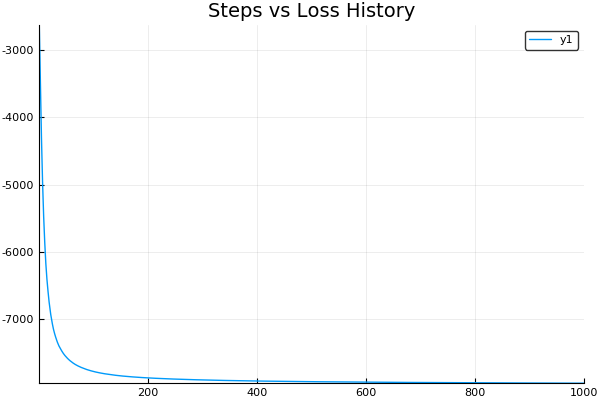

In [18]:
x = [i for i= 1:nb_steps] ; y = loss_history
plot(x,y)
title!("Steps vs Loss History")


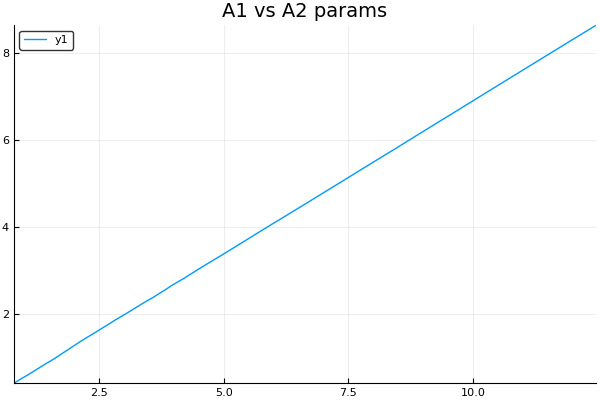

In [19]:
x = param_history_a1;
y = param_history_a2
plot(x,y)
title!("A1 vs A2 params")


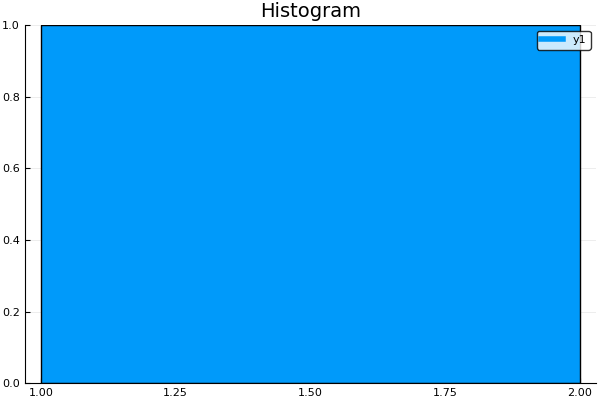

In [32]:
# Histogram of Final Output
histogram(y_pred_a, bins= 50)
title!("Histogram")


In [37]:
sum(y_training_a.==0)

0

In [38]:
typeof(y_training_a)

Array{Any,1}